In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("C:/Users/Winner/Desktop/Salary_Data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [3]:
train, test = train_test_split(data,test_size=0.2)
print(train.shape)
print(test.shape)

(24, 2)
(6, 2)


In [4]:
x = train['YearsExperience'] .values.reshape(-1,1)
y = train['Salary'].values.reshape(-1,1)

In [5]:
model = lr()
train_model = model.fit(x,y)
print(train_model)
print('Salary hike model training is done.')

LinearRegression()
Salary hike model training is done.


In [6]:
print(model.coef_)
print(model.intercept_)

[[9719.94396822]]
[23917.89524357]


In [7]:
x = 2
y = format(round((model.coef_[0][0])*x + (model.intercept_[0])),',')
print("The salary is USD {}, after {} years of work experience.".format(y,x))

The salary is USD 43,358, after 2 years of work experience.


In [8]:
x = 5.5
y = format(round((model.coef_[0][0])*x + (model.intercept_[0])),',')
print("The salary is USD {}, after {} years of work experience.".format(y,x))

The salary is USD 77,378, after 5.5 years of work experience.


In [9]:
x = 16
y = format(round((model.coef_[0][0])*x + (model.intercept_[0])),',')
print("The salary is USD {}, after {} years of work experience.".format(y,x))

The salary is USD 179,437, after 16 years of work experience.


In [10]:
x_test = test['YearsExperience'].values.reshape(-1,1)
x_test

array([[10.5],
       [ 3. ],
       [ 2.9],
       [ 1.1],
       [ 1.5],
       [ 6.8]])

In [11]:
pred_sal = train_model.predict(x_test)
pred_sal

array([[125977.30690989],
       [ 53077.72714823],
       [ 52105.73275141],
       [ 34609.83360861],
       [ 38497.8111959 ],
       [ 90013.51422747]])

In [12]:
test['Pred_Sal'] = train_model.predict(x_test)
test['Error'] = test['Salary'] - test['Pred_Sal']
test

,YearsExperience,Salary,Pred_Sal,Error
29,10.5,121872,125977.306910,-4105.306910
6,3.0,60150,53077.727148,7072.272852
5,2.9,56642,52105.732751,4536.267249
0,1.1,39343,34609.833609,4733.166391
2,1.5,37731,38497.811196,-766.811196
20,6.8,91738,90013.514227,1724.485773


<Axes: xlabel='YearsExperience', ylabel='Pred_Sal'>

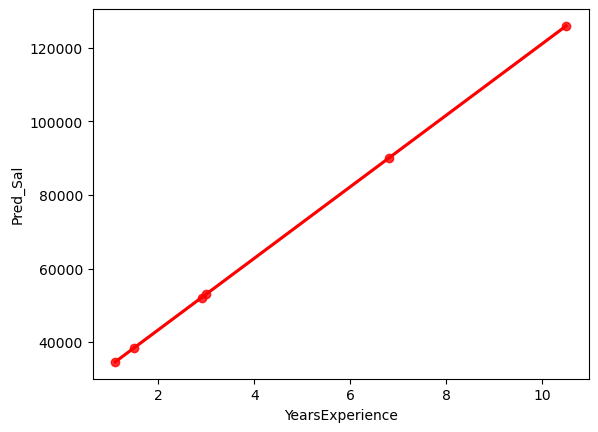

In [13]:
sns.regplot(x = 'YearsExperience', y = 'Pred_Sal', data = test, color='red')

<Axes: xlabel='YearsExperience', ylabel='Salary'>

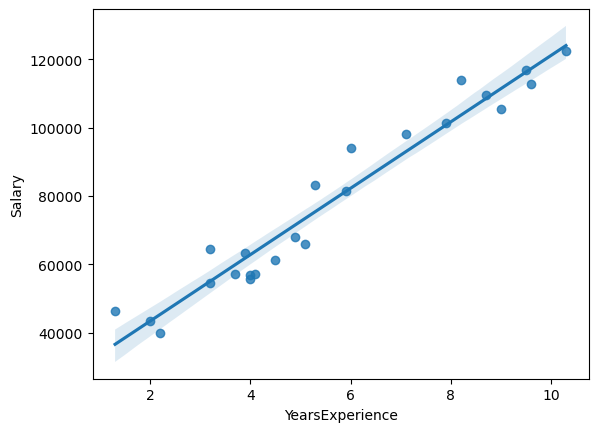

In [14]:
sns.regplot(x = 'YearsExperience', y = 'Salary', data = train)